In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

### kNN class

In [2]:
class kNN:

    def __init__(self, n_neighbors=5, regression=False, distance_type="euclidean"):
        self.n_neighbors = n_neighbors
        self.regression = regression
        self.distance_type = distance_type

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def _euclidean_distances(self, x):
        return np.sqrt(np.sum((self.X_train - x)**2, axis=1))
    
    def _manhattan_distances(self, x):
        return np.sum(np.abs(self.X_train - x), axis=1)
    
    def _chebyshev_distances(self, x):
        return np.max(np.abs(self.X_train - x), axis=1)
    
    def _make_prediction(self, x):
        # compute distances to all training data points
        if self.distance_type == "euclidean":
            distances = self._euclidean_distances(x)
        elif self.distance_type == "manhattan":
            distances = self._manhattan_distances(x)
        elif self.distance_type == "chebyshev":
            distances = self._chebyshev_distances(x)
        else:
            raise NotImplementedError(f"The method for distance type: {self.distance_type} is not implemented")

        k_nearest_indices = np.argsort(distances)[:self.n_neighbors]
        targets = self.y_train[k_nearest_indices]    # k-nearest neighbors target values
        if self.regression:
            return np.mean(targets)
        else:
            return np.bincount(targets).argmax()
        
    def predict(self, X_test):
        return np.array([self._make_prediction(x) for x in X_test])    

### kNN Classifier

In [3]:
iris_data = load_iris()

iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
X = iris_data['data']
y = iris_data['target']
target_names = iris_data['target_names']
feature_names = iris_data['feature_names']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

X_train.shape, X_test.shape


((105, 4), (45, 4))

In [5]:
knn_clf = kNN(n_neighbors=5, regression=False, distance_type="euclidean")

knn_clf.fit(X_train, y_train)

y_pred_train = knn_clf.predict(X_train)
y_pred_test = knn_clf.predict(X_test)

In [6]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [7]:
accuracy_score(y_train, y_pred_train)  # train accuracy

0.9809523809523809

In [8]:
accuracy_score(y_test, y_pred_test) # test accuracy

0.9777777777777777

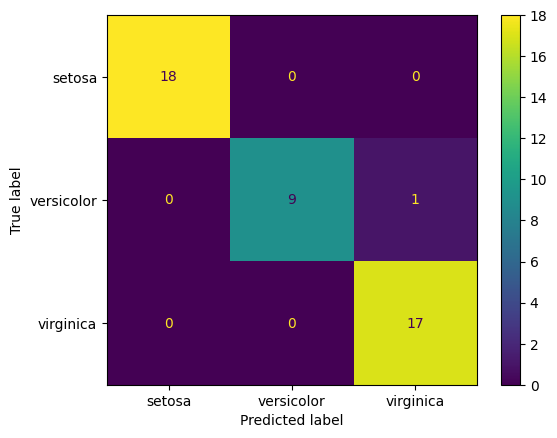

In [9]:
cm = confusion_matrix(y_test, y_pred_test)

ConfusionMatrixDisplay(cm, display_labels=target_names).plot();

### kNN classifier in sklearn

documentation: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
knn_clf_sk = KNeighborsClassifier(n_neighbors=5)
knn_clf_sk.fit(X_train, y_train)

y_pred_train = knn_clf_sk.predict(X_train)
y_pred_test = knn_clf_sk.predict(X_test)

In [12]:
accuracy_score(y_train, y_pred_train)  # train accuracy

0.9809523809523809

In [13]:
accuracy_score(y_test, y_pred_test) # test accuracy

0.9777777777777777

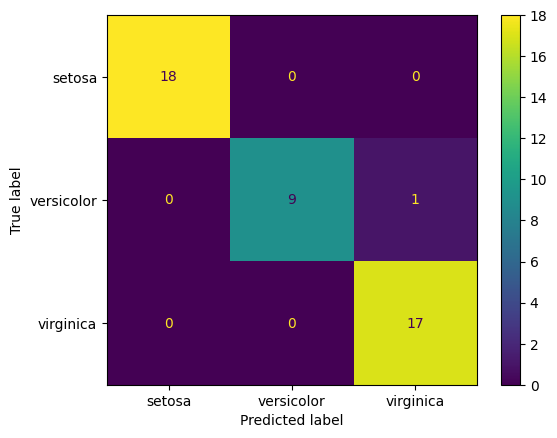

In [14]:
cm = confusion_matrix(y_test, y_pred_test)

ConfusionMatrixDisplay(cm, display_labels=target_names).plot();

### Displaying the decision boundary of kNN classifier

documentation: https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html

In [15]:
from sklearn.inspection import DecisionBoundaryDisplay

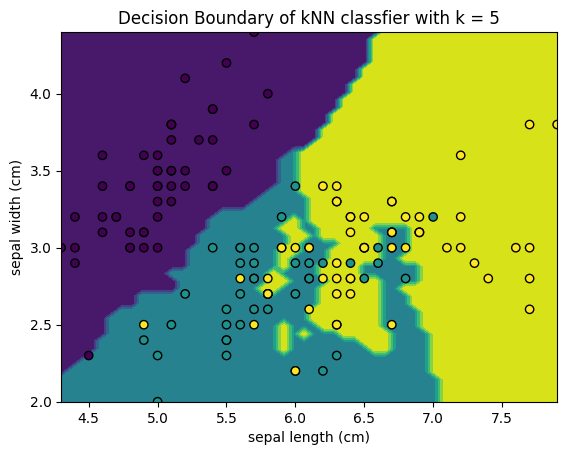

In [16]:
feature_1, feature_2 = np.meshgrid(
    np.linspace(X[:, 0].min(), X[:, 0].max()),
    np.linspace(X[:, 1].min(), X[:, 1].max())
)

grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T
k = 5
clf = KNeighborsClassifier(n_neighbors=k).fit(X[:, :2], y)

y_pred = np.reshape(clf.predict(grid), feature_1.shape)

display = DecisionBoundaryDisplay(
    xx0=feature_1, xx1=feature_2, response=y_pred
)
display.plot()

display.ax_.scatter(
    X[:, 0], X[:, 1], c=y, edgecolor="black"
)

display.ax_.set_title(f"Decision Boundary of kNN classfier with k = {k}")
display.ax_.set_xlabel(feature_names[0])
display.ax_.set_ylabel(feature_names[1])
plt.show()

You can see that the as `k` increases the decision boundary becomes more simplified. (check it yourself)

### Compare the same with the decision boundary of Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

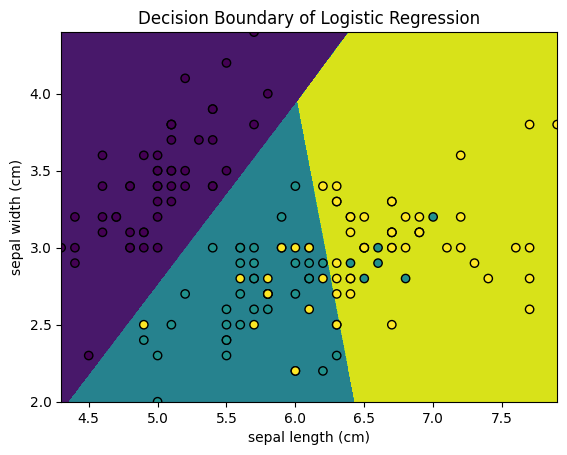

In [18]:
feature_1, feature_2 = np.meshgrid(
    np.linspace(X[:, 0].min(), X[:, 0].max(), 1000),
    np.linspace(X[:, 1].min(), X[:, 1].max(), 1000)
)

grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T

clf_lr = LogisticRegression(penalty=None, max_iter=1000).fit(X[:, :2], y)

y_pred = np.reshape(clf_lr.predict(grid), feature_1.shape)

display = DecisionBoundaryDisplay(
    xx0=feature_1, xx1=feature_2, response=y_pred
)
display.plot()

display.ax_.scatter(
    X[:, 0], X[:, 1], c=y, edgecolor="black"
)

display.ax_.set_xlabel(feature_names[0])
display.ax_.set_ylabel(feature_names[1])
display.ax_.set_title("Decision Boundary of Logistic Regression")
plt.show()

As you can see, LR being a linear classifier, the decision boundaries are linear.

### kNN Regressor

In [19]:
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score

In [20]:
# Creating a synthetic regression dataset

X, y = make_regression(n_samples=1000,   # number of data points
                       n_features=2,     # number of features
                       n_informative=2,  # number of informative features
                       bias=2.0)         # bias of the underlying linear model

feature_names = ['x1', 'x2']

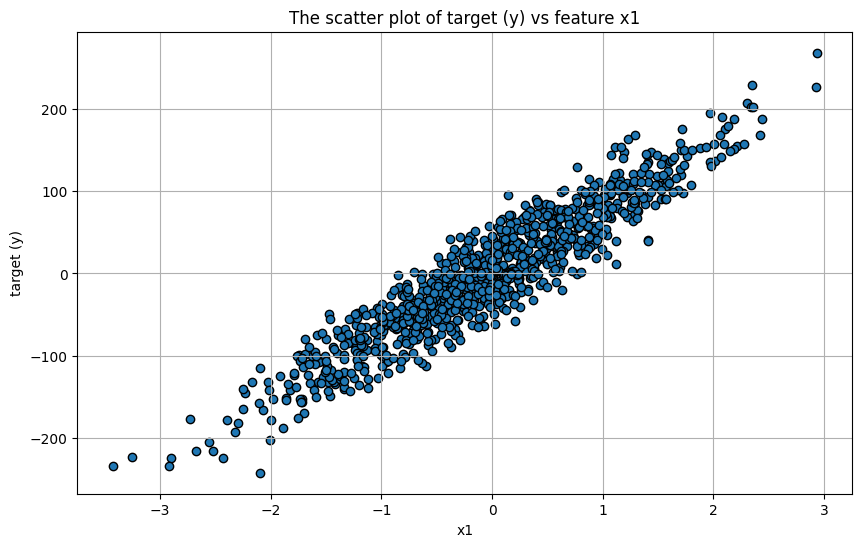

In [21]:
# Plotting the target (y) vs first feature (x1)

plt.figure(figsize=(10,6))
plt.scatter(X[:,0], y, edgecolor='k')
plt.xlabel("x1")
plt.ylabel("target (y)")
plt.title("The scatter plot of target (y) vs feature x1")
plt.grid()
plt.show()

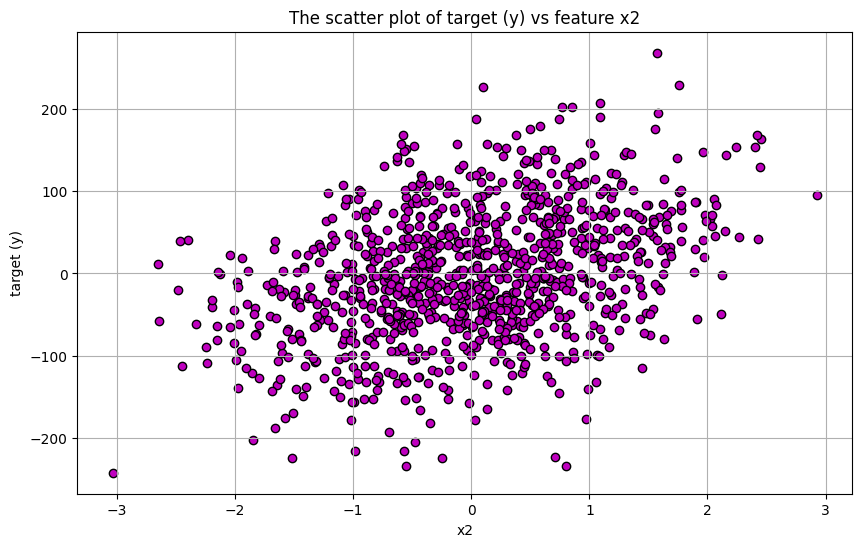

In [22]:
# Plotting the target (y) vs first feature (x2)

plt.figure(figsize=(10,6))
plt.scatter(X[:,1], y, edgecolor='k', color='m')
plt.xlabel("x2")
plt.ylabel("target (y)")
plt.title("The scatter plot of target (y) vs feature x2")
plt.grid()
plt.show()

In [23]:
knn_reg = kNN(n_neighbors=5, regression=True, distance_type="euclidean")

knn_reg.fit(X, y)

In [24]:
# Showing the kNN regression line

feature_1_values = np.linspace(X[:,0].min(), X[:,0].max(), 100)
feature_2_values = np.linspace(X[:,1].min(), X[:,1].max(), 100)


In [25]:
X_test = np.hstack([feature_1_values.reshape(-1,1), feature_2_values.reshape(-1,1)])

y_pred = knn_reg.predict(X_test)

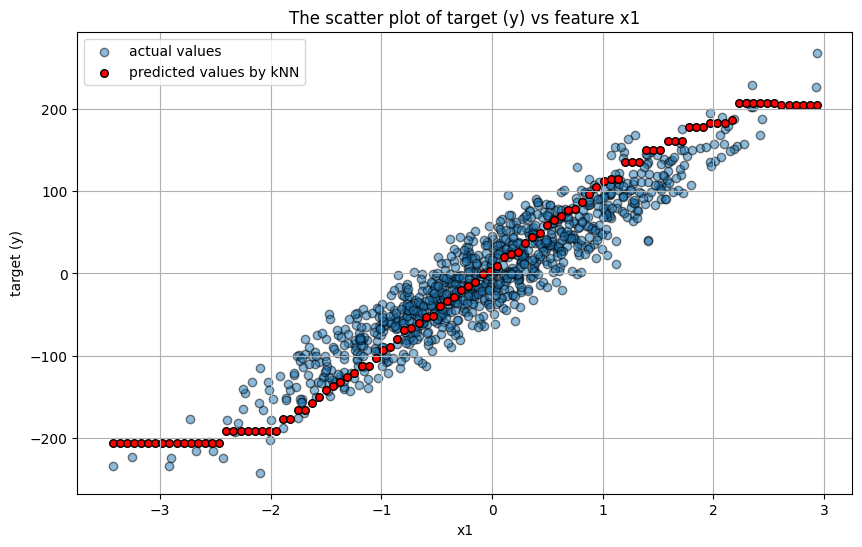

In [26]:
# Plotting the predicted value vs first feature (x1) on top of the scatter plot

plt.figure(figsize=(10,6))
plt.scatter(X[:,0], y, edgecolor='k', alpha=0.5, label="actual values")
plt.scatter(X_test[:,0], y_pred, color='r', marker='o', edgecolor='k', s=30, label="predicted values by kNN")
plt.xlabel("x1")
plt.ylabel("target (y)")
plt.title("The scatter plot of target (y) vs feature x1")
plt.legend()
plt.grid()
plt.show()

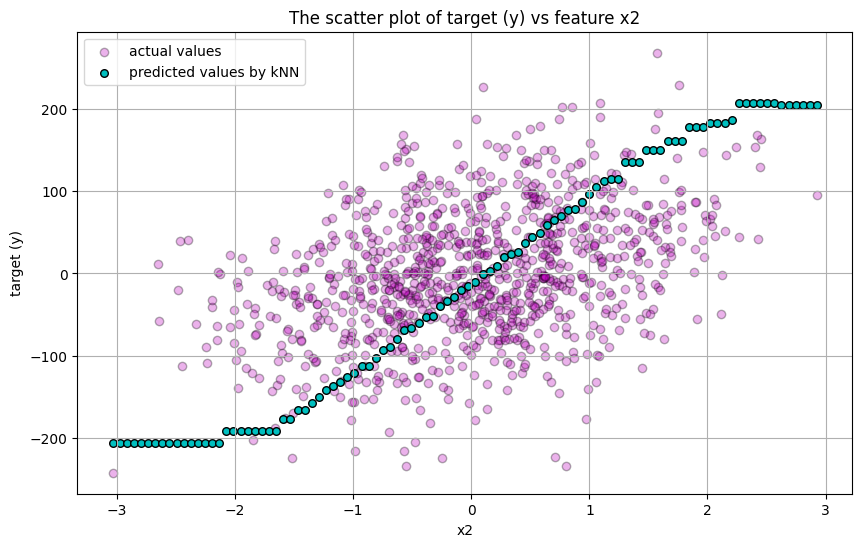

In [27]:
# Plotting the predicted value vs second feature (x2) on top of the scatter plot

plt.figure(figsize=(10,6))
plt.scatter(X[:,1], y, edgecolor='k', color='m', alpha=0.3, label="actual values")
plt.scatter(X_test[:,1], y_pred, color='c', marker='o', edgecolor='k', s=30, label="predicted values by kNN")
plt.xlabel("x2")
plt.ylabel("target (y)")
plt.title("The scatter plot of target (y) vs feature x2")
plt.legend()
plt.grid()
plt.show()

In [28]:
y_pred_train = knn_reg.predict(X)

r2_score(y_pred=y_pred_train, y_true=y)

0.9966605602527754

Similar analysis can be done for `KNeighborsRegressor` class defined within `sklearn.neighbors` (do it yourself)